In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import graph_examples as examples
import triconnected_components as tcc ### TODO CAMBIAR AL CAMBIAR NOMBRE 
import printers 
import networkx as nx
import matplotlib.pyplot as plt
graph_examples = examples.GraphExamples.get_examples()
finder = tcc.TriconnectedFinder()
printer = printers.ConnectedComponentsDrawer()

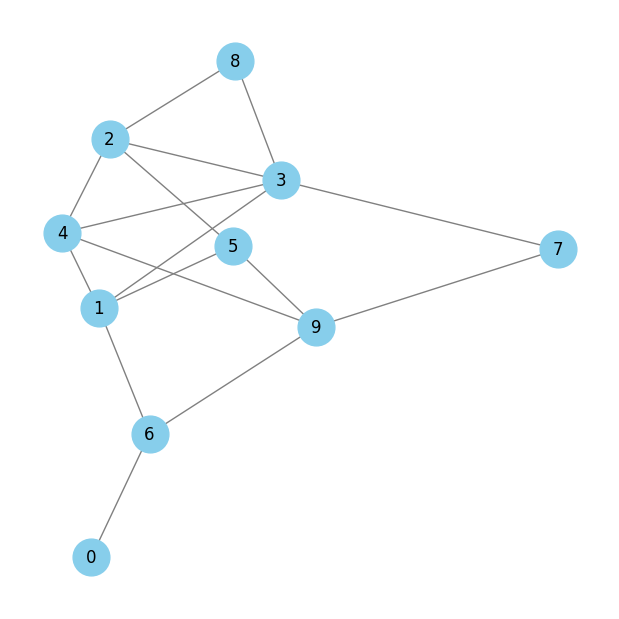

In [3]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#np.random.seed(3244861328)

# Parameters
n = 10 # Number of nodes
p = 0.3 # Probability of edge creation

G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

[{'node_list': frozenset({9, 3, 7}), 'virtual_edges': [(3, 9)]}, {'node_list': frozenset({1, 2, 3, 4, 5, 9}), 'virtual_edges': [(1, 9), (3, 9)]}, {'node_list': frozenset({8, 2, 3}), 'virtual_edges': []}, {'node_list': frozenset({1, 6, 9}), 'virtual_edges': [(1, 9)]}]


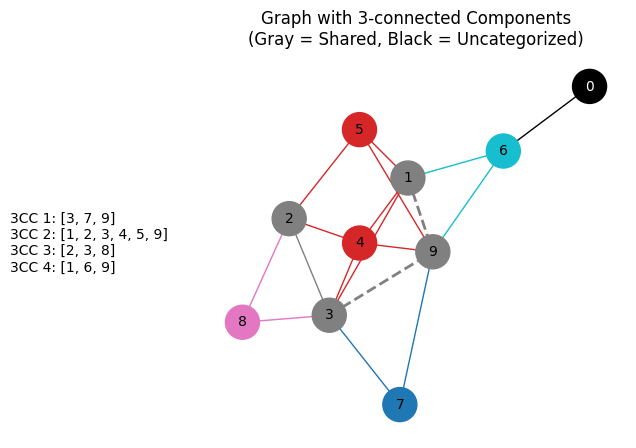

In [4]:
### FIND TRICONNECTED COMPONENTS OF G ###

results, info = finder.triconnected_comps(G)
print(results)
printer.print_n_connected_components(G, results, N=3)


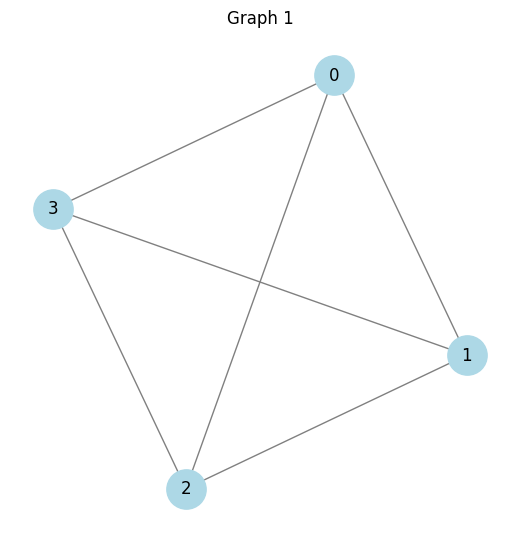

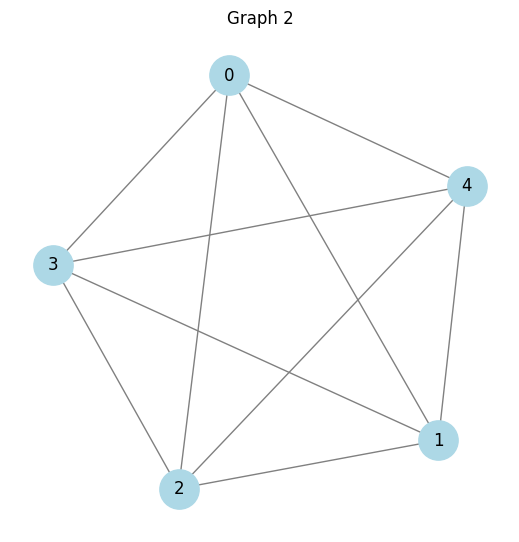

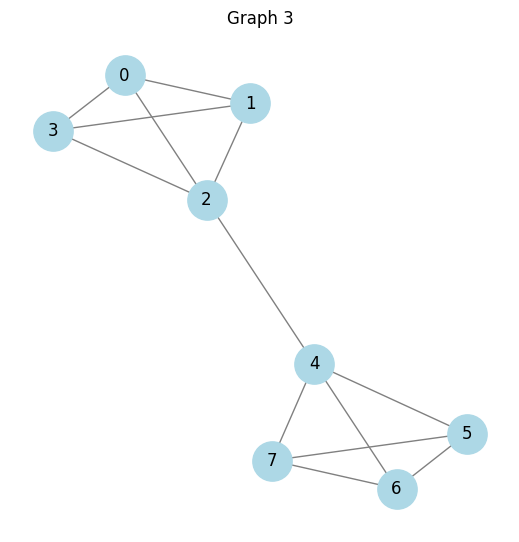

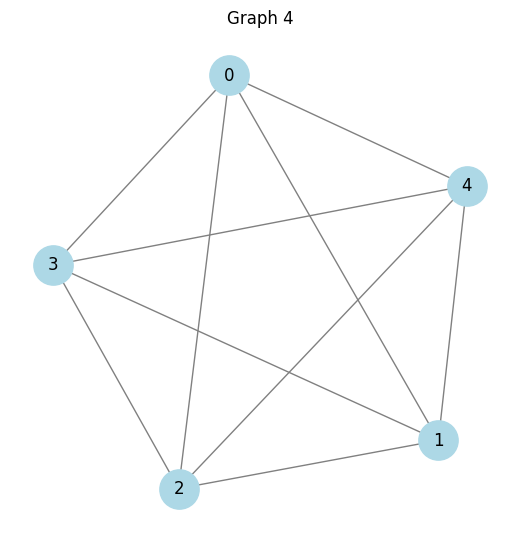

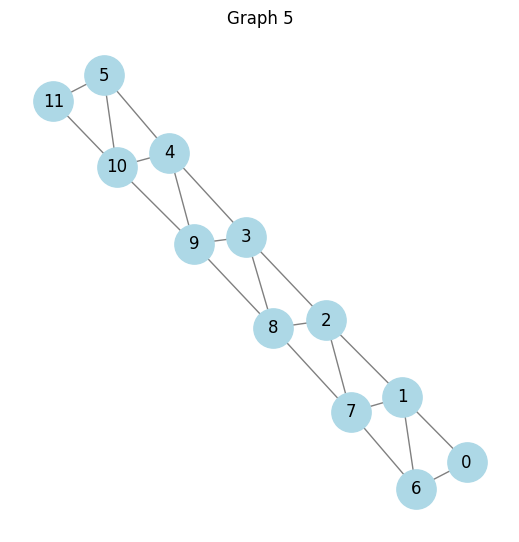

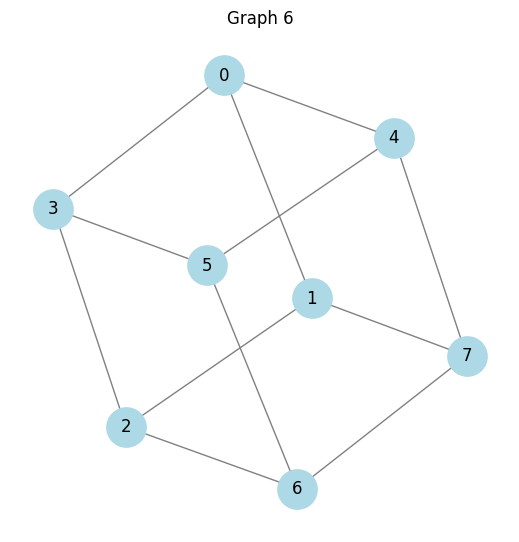

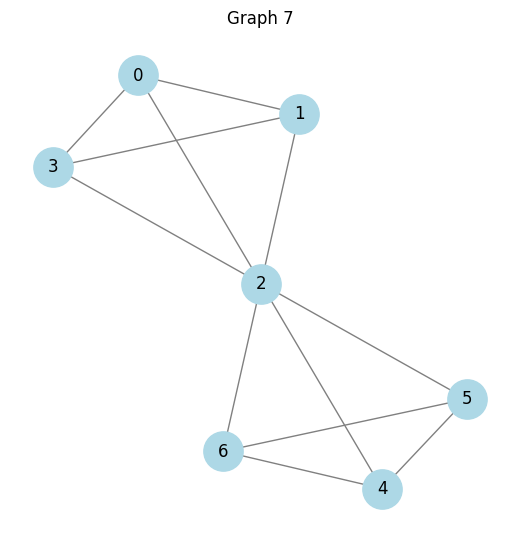

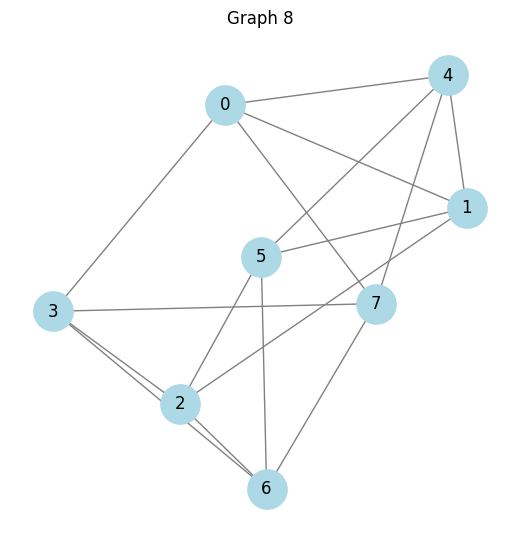

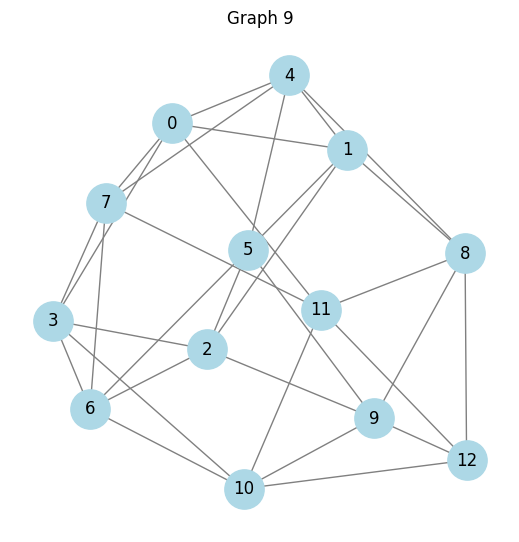

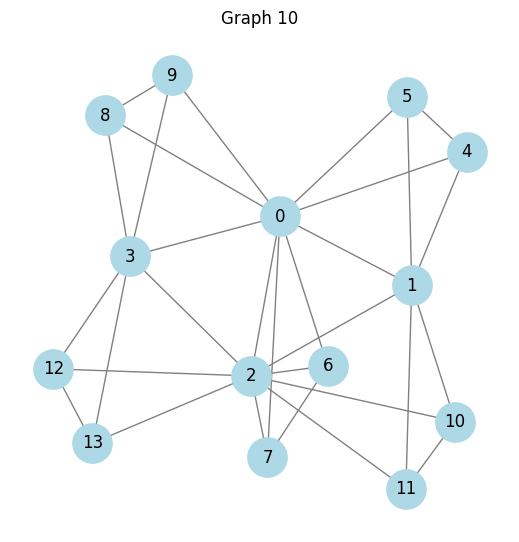

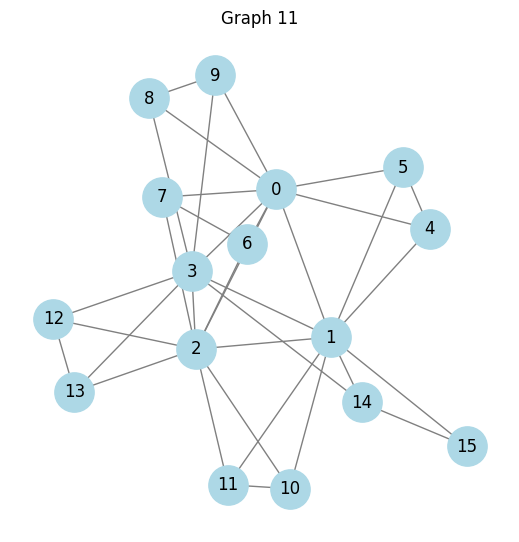

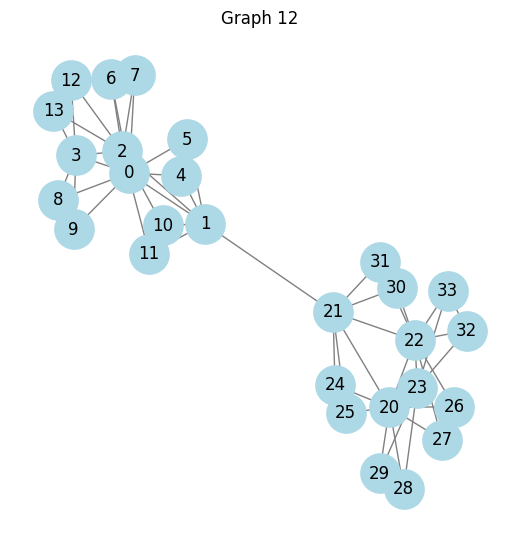

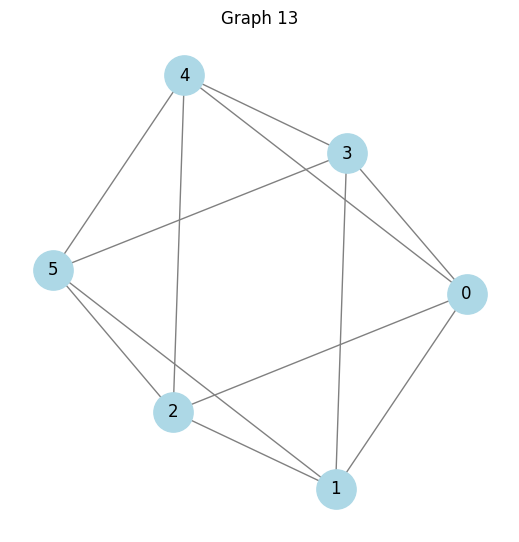

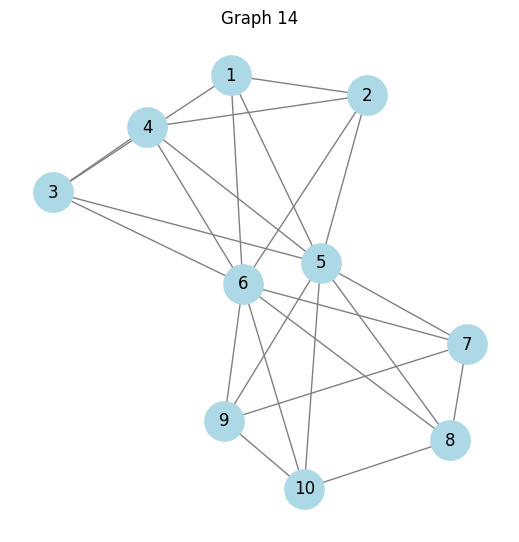

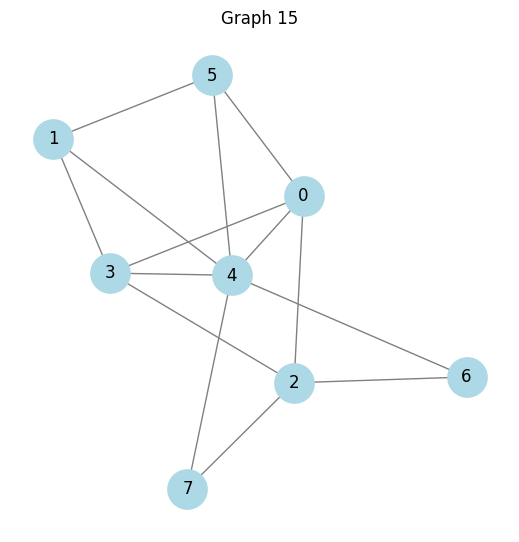

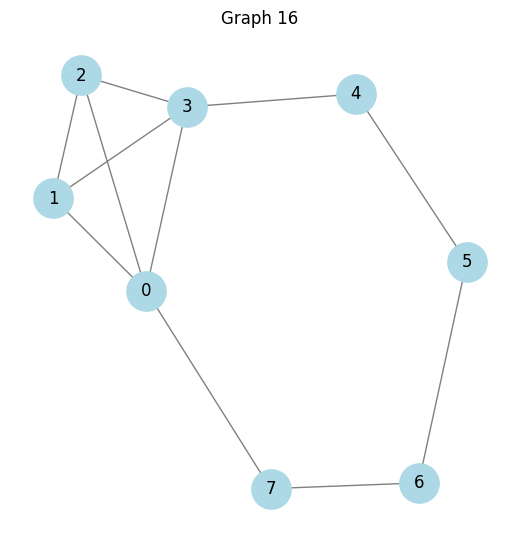

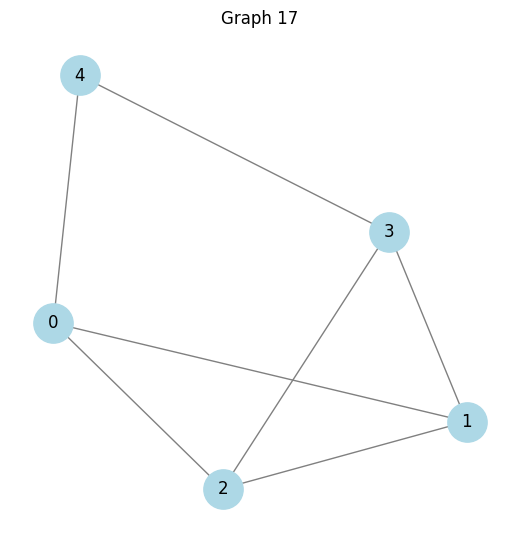

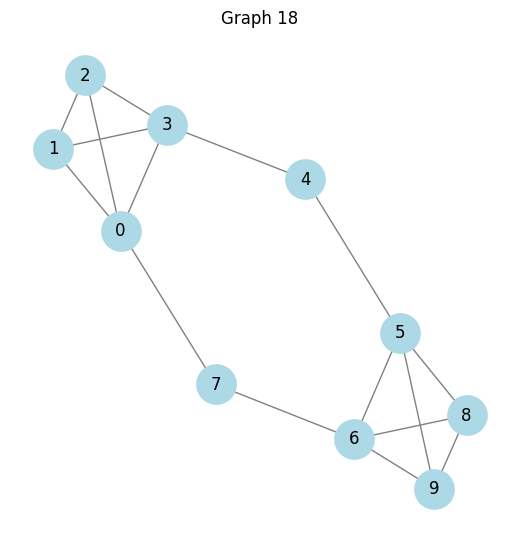

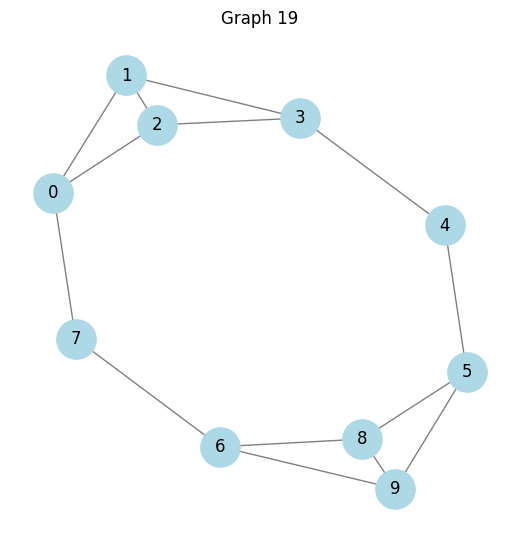

In [5]:
### DRAW GRAPH EXAMPLES ###

import matplotlib.pyplot as plt

def draw_graph(G, title):
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G, seed=42)  # Positions for nodes
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=12)
    plt.title(title)
    plt.show()

# Iterate over the graphs and draw them
for i, G in enumerate(graph_examples):
    draw_graph(G, f"Graph {i+1}")

Graph  1  Biconnected Components:


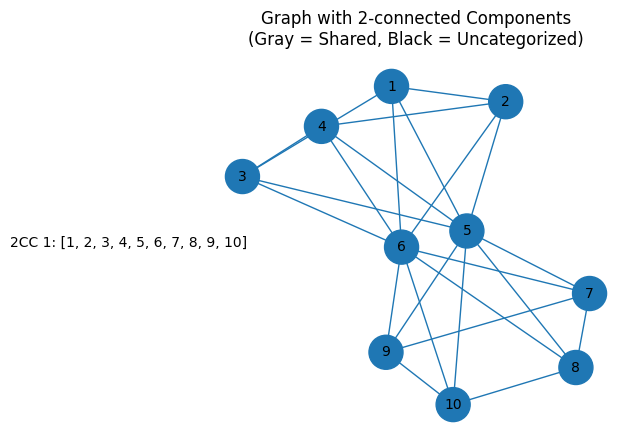

Graph  1  Triconnected Components:


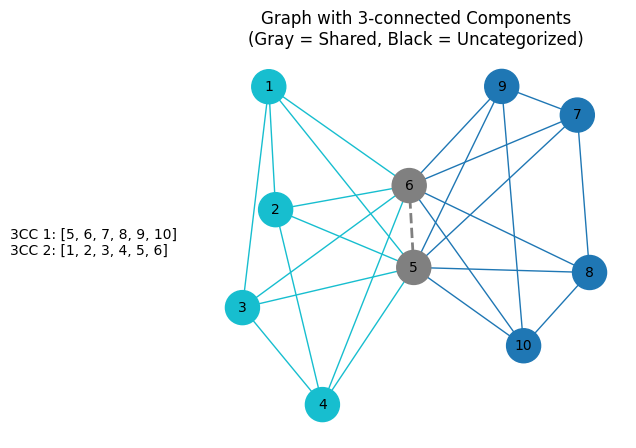

In [6]:
### FIND AND PRINT TRICONNECTED COMPONENTS ###

all_TCCs = [finder.triconnected_comps(G)[0] for G in graph_examples]

for i, (graph_ex, TCC_ex) in enumerate(zip([graph_examples[13]], [all_TCCs[13]])):
    # Get biconnected components (as sets of edges)
    bicomponents = list(nx.biconnected_components(graph_ex))

    # Convert each component into a subgraph
    bi_subgraphs = [graph_ex.subgraph(component).copy() for component in bicomponents]

    print("Graph ", i + 1, " Biconnected Components:")
    printer.print_n_connected_components(graph_ex, bi_subgraphs, N=2, save=True, name=("biconnected examples" + str(i + 1)))
    
    print("Graph ", i + 1, " Triconnected Components:")
    printer.print_n_connected_components_fixed_positions(graph_ex, TCC_ex, N=3, save=True, name=("triconnected examples" + str(i + 1)), fixed_pos={4: (0, 0)})